# Model evaluation: SVM (sentiment)

---

## Table of Contents

1. [Imports](#imports)
2. [Model loading](#model-loading)
3. [Data loading and tokenization](#data-loading-and-tokenization)
4. [Evaluation](#evaluation)
5. [Report](#report)

# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
MAX_FEATURES = 20000

# Model loading

In [3]:
model_path = './SVM_sentiment_model/svm_sentiment_model.pkl'
vectorizer_path = './SVM_sentiment_model/tfidf_vectorizer.pkl'

In [4]:
model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

# Data loading and tokenization

In [5]:
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..'))
test_file = os.path.join(base_dir, 'test_sentiment.csv')

test_data = pd.read_csv(test_file)
X_test_texts = test_data['text']
y_test = test_data['label'].values

In [6]:
X_test = vectorizer.transform(X_test_texts)

# Evaluation

In [7]:
y_test_pred = model.predict(X_test)

# Report

In [8]:
class_names = ['Negatywny', 'Neutralny', 'Pozytywny']

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

   Negatywny       0.58      0.68      0.62      3391
   Neutralny       0.66      0.63      0.64      6322
   Pozytywny       0.73      0.68      0.71      5087

    accuracy                           0.66     14800
   macro avg       0.65      0.66      0.66     14800
weighted avg       0.66      0.66      0.66     14800


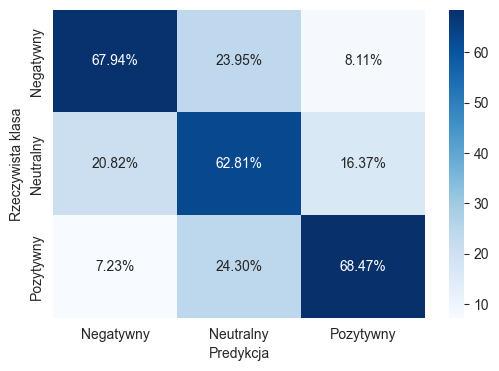

In [10]:
cm = confusion_matrix(y_test, y_test_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=labels, fmt="", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.savefig("cf_mat_svm_sentiment.png", dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()

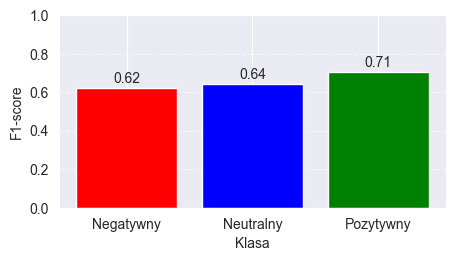

In [11]:
report = classification_report(y_test, y_test_pred, output_dict=True, target_names=class_names)
f1_scores = [report[label]['f1-score'] for label in class_names]

plt.figure(figsize=(5, 2.5))
bars = plt.bar(class_names, f1_scores, color=['red', 'blue', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.ylabel('F1-score')
plt.xlabel('Klasa')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("f1_bar_svm_sentiment.png", dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()